# Placement Prediction Model

## Importing and understanding data

In [ ]:
import numpy as np

import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt

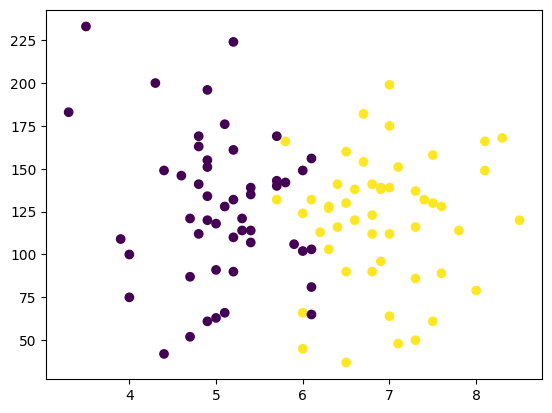

In [ ]:
plt.scatter(df['cgpa'],df['iq'] , c = df['placement'])

## Extracting input and output columns

In [ ]:
X = df.iloc[:,0:2]

Y = df.iloc[:,-1]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


## Train Test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.1)

In [ ]:
X_test

,cgpa,iq
45,6.0,66.0
66,6.9,96.0
95,4.3,200.0
68,4.0,75.0
44,7.5,61.0
47,5.2,161.0
70,6.3,127.0
94,4.7,52.0
78,6.1,81.0
32,7.0,139.0


In [ ]:
X_train

,cgpa,iq
46,5.3,114.0
17,3.3,183.0
24,4.7,121.0
58,8.0,79.0
22,4.9,120.0
...,...,...
48,6.6,138.0
33,6.0,149.0
53,8.3,168.0
16,5.2,224.0


## Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

array([[-0.627086  , -0.30079243],
       [-2.38801394,  1.49528545],
       [-1.15536438, -0.11858163],
       [ 1.75016671, -1.21184643],
       [-0.97927159, -0.14461175],
       [ 1.30993472,  0.1156894 ],
       [-0.89122519, -0.19667197],
       [ 1.8382131 ,  1.05277351],
       [ 0.86970274,  1.91176728],
       [ 0.69360995,  0.40202065],
       [ 0.16533157, -0.32682255],
       [ 0.07728517, -0.58712369],
       [-0.53903961, -0.30079243],
       [-0.01076123, -0.04049129],
       [-1.06731799,  0.40202065],
       [ 0.51751715, -0.14461175],
       [-0.09880762, -0.50903335],
       [ 1.13384193, -0.2487322 ],
       [ 1.57407391, -0.30079243],
       [-1.06731799,  0.97468317],
       [-1.06731799,  1.13086385],
       [-0.89122519, -1.62832826],
       [-0.01076123, -0.6131538 ],
       [-0.18685402,  1.05277351],
       [-1.85973556, -0.430943  ],
       [ 0.42947076, -2.30511123],
       [ 0.34142436,  0.40202065],
       [-0.7151324 , -0.40491289],
       [-0.97927159,

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
X_test

array([[-0.01076123, -1.55023792],
       [ 0.78165634, -0.76933449],
       [-1.50754997,  1.9377974 ],
       [-1.77168916, -1.31596689],
       [ 1.30993472, -1.68038849],
       [-0.7151324 ,  0.92262294],
       [ 0.25337796,  0.03759905],
       [-1.15536438, -1.91465952],
       [ 0.07728517, -1.1597862 ],
       [ 0.86970274,  0.34996043]])

## Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:
clf.fit(X_train , Y_train)

LogisticRegression()

## Evaluating the model

In [ ]:
clf.predict(X_test)

array([1, 1, 0, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
Y_test

,placement
45,1
66,1
95,0
68,0
44,1
47,0
70,1
94,0
78,0
32,1


In [ ]:
Y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred) * 100

90.0

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

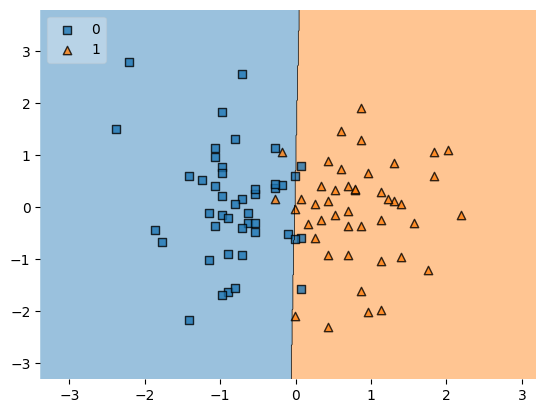

In [ ]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

## deployment

In [ ]:
import pickle

In [ ]:
pickle.dump(clf,open('placement_model.pkl','wb'))